In [1]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Descriptors
import pandas as pd 
import numpy as np 


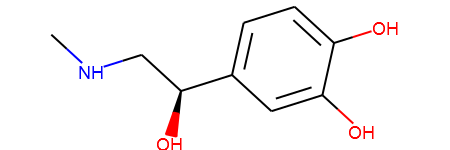

In [2]:
#lets visualize the fingerprints! 
ephinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
ephinephrine

In [3]:
from rdkit.Chem import rdMolDescriptors

#look at the morgon bits! 
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(ephinephrine, radius = 2, bitInfo = bi)

#lets show 10 no of bits ! 
list(fp.GetOnBits())[:10] #its a vector format! 

[1, 80, 227, 315, 589, 606, 632, 807, 875, 1057]

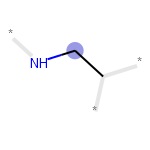

In [4]:
#if u want  to specifically see the fingerprint where its placed then we have to do! 
Draw.DrawMorganBit(ephinephrine, 589, bitInfo = bi)
Draw.DrawMorganBit(ephinephrine, 606, bitInfo = bi)

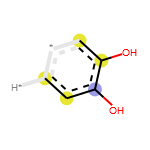

In [5]:
Draw.DrawMorganBit(ephinephrine, 589, bitInfo = bi)

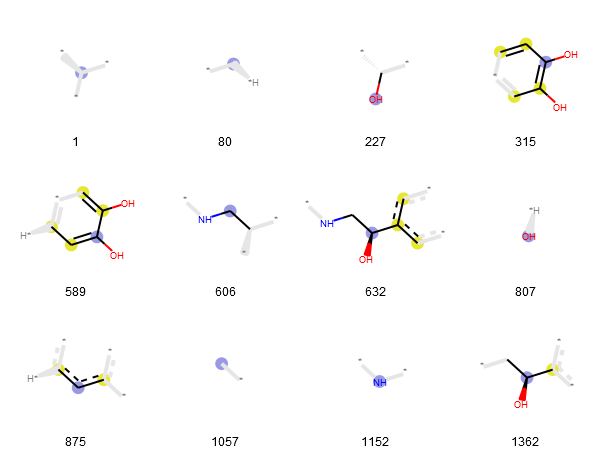

In [6]:
#Central atom always denoted in BLUE COLOR! 
#aromatic atom in yellow color! 
#aliphatic atom in dark grey! 

#to convert the stcruture into bits and piecess! 
tpls = [(ephinephrine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:12], molsPerRow = 4, legends = [str(x) for x in fp.GetOnBits()][:12])

In [7]:
#based on radius and no of bits we can get the FINGERPRINTS ! 


In [8]:
#lets calculate the descirptors!
print ('Heavy atoms:', Descriptors.HeavyAtomCount(ephinephrine))
print ('H-bond donors:', Descriptors.NumHDonors(ephinephrine))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(ephinephrine))
print ('Molecular weight:', Descriptors.MolWt(ephinephrine))
print ('LogP:', Descriptors.MolLogP(ephinephrine))

Heavy atoms: 13
H-bond donors: 4
H-bond acceptors: 4
Molecular weight: 183.207
LogP: 0.35060000000000013


In [11]:
import matplotlib.plot as plt
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
contribs = rdMolDescriptors._CalcCrippenContribs(mol1)

ModuleNotFoundError: No module named 'matplotlib'

In [12]:
import matplotlib.plot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)



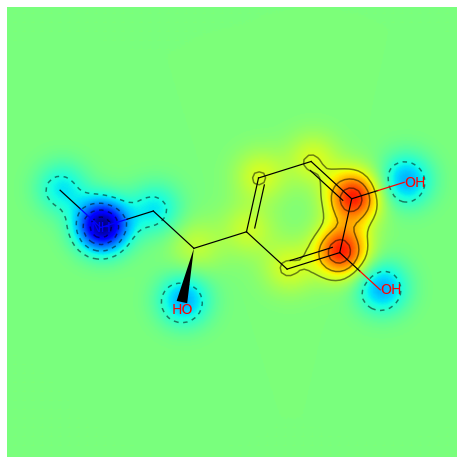

In [22]:
import matplotlib.pyplot as plt #SIMILARITY MAP! 
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
contribs = rdMolDescriptors._CalcCrippenContribs(ephinephrine)
fig = SimilarityMaps.GetSimilarityMapFromWeights(ephinephrine,[x for x,y in contribs], colorMap='jet', contourLines=10)